In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
import joblib

In [2]:
# 1. Load data
df = pd.read_csv("application_train.csv")
print("Shape:", df.shape)
print(df[["SK_ID_CURR","TARGET"]].head())

Shape: (307511, 122)
   SK_ID_CURR  TARGET
0      100002       1
1      100003       0
2      100004       0
3      100006       0
4      100007       0


In [3]:
import pandas as pd

df = pd.read_csv("application_train.csv")

print("Jumlah total baris:", len(df))
print("Jumlah unik SK_ID_CURR:", df["SK_ID_CURR"].nunique())
print("Jumlah duplikat SK_ID_CURR:", len(df) - df["SK_ID_CURR"].nunique())


Jumlah total baris: 307511
Jumlah unik SK_ID_CURR: 307511
Jumlah duplikat SK_ID_CURR: 0


In [4]:
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing_percent = (missing / len(df)) * 100

missing_summary = pd.DataFrame({
    "missing_count": missing,
    "missing_percent": missing_percent
})

print(missing_summary.head(20))


                          missing_count  missing_percent
COMMONAREA_MEDI                  214865        69.872297
COMMONAREA_AVG                   214865        69.872297
COMMONAREA_MODE                  214865        69.872297
NONLIVINGAPARTMENTS_MODE         213514        69.432963
NONLIVINGAPARTMENTS_AVG          213514        69.432963
NONLIVINGAPARTMENTS_MEDI         213514        69.432963
FONDKAPREMONT_MODE               210295        68.386172
LIVINGAPARTMENTS_MODE            210199        68.354953
LIVINGAPARTMENTS_AVG             210199        68.354953
LIVINGAPARTMENTS_MEDI            210199        68.354953
FLOORSMIN_AVG                    208642        67.848630
FLOORSMIN_MODE                   208642        67.848630
FLOORSMIN_MEDI                   208642        67.848630
YEARS_BUILD_MEDI                 204488        66.497784
YEARS_BUILD_MODE                 204488        66.497784
YEARS_BUILD_AVG                  204488        66.497784
OWN_CAR_AGE                    

In [5]:
# Drop kolom dengan missing > 40%
df_clean = df.loc[:, df.isnull().mean() <= 0.40]   # 0.40 = 40%

# Cek ulang pada df_clean
missing_after = df_clean.isnull().sum().sort_values(ascending=False)
missing_after_percent = (missing_after / len(df_clean)) * 100

print("Kolom tersisa:", df_clean.shape[1])
print(missing_after.head(10))
print(missing_after_percent.head(10))


Kolom tersisa: 73
OCCUPATION_TYPE               96391
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
NAME_TYPE_SUITE                1292
OBS_30_CNT_SOCIAL_CIRCLE       1021
dtype: int64
OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
dtype: float64


In [6]:
import numpy as np
from sklearn.impute import SimpleImputer

# Pisahkan numerik & kategorikal
num_cols = df_clean.select_dtypes(include=[np.number]).columns
cat_cols = df_clean.select_dtypes(exclude=[np.number]).columns

# Impute numerik = median
num_imputer = SimpleImputer(strategy="median")
df_clean[num_cols] = num_imputer.fit_transform(df_clean[num_cols])

# Impute kategorikal = "Unknown" (atau modus)
df_clean[cat_cols] = df_clean[cat_cols].fillna("Unknown")


C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_23300\3187024796.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[num_cols] = num_imputer.fit_transform(df_clean[num_cols])
C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_23300\3187024796.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[cat_cols] = df_clean[cat_cols].fillna("Unknown")


In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  float64
 1   TARGET                       307511 non-null  float64
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  float64
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

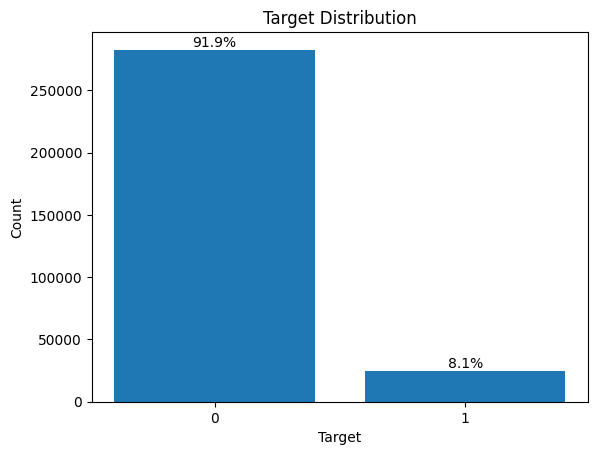

In [8]:
import matplotlib.pyplot as plt
# Distribusi TARGET
target_counts = df["TARGET"].value_counts()
target_ratio = df["TARGET"].value_counts(normalize=True) * 100

plt.bar(target_counts.index.astype(str), target_counts.values)
plt.title("Target Distribution")
plt.xlabel("Target")
plt.ylabel("Count")
for i, v in enumerate(target_counts.values):
    plt.text(i, v, f"{target_ratio.iloc[i]:.1f}%", ha="center", va="bottom")
plt.show()

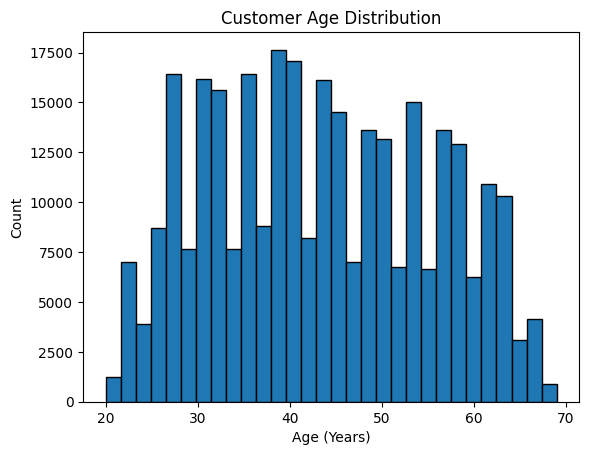

In [9]:
# 2. Histogram Umur (DAYS_BIRTH dikonversi ke tahun)
df["AGE"] = (-df["DAYS_BIRTH"] / 365).astype(int)
plt.hist(df["AGE"], bins=30, edgecolor="k")
plt.title("Customer Age Distribution")
plt.xlabel("Age (Years)")
plt.ylabel("Count")
plt.show()

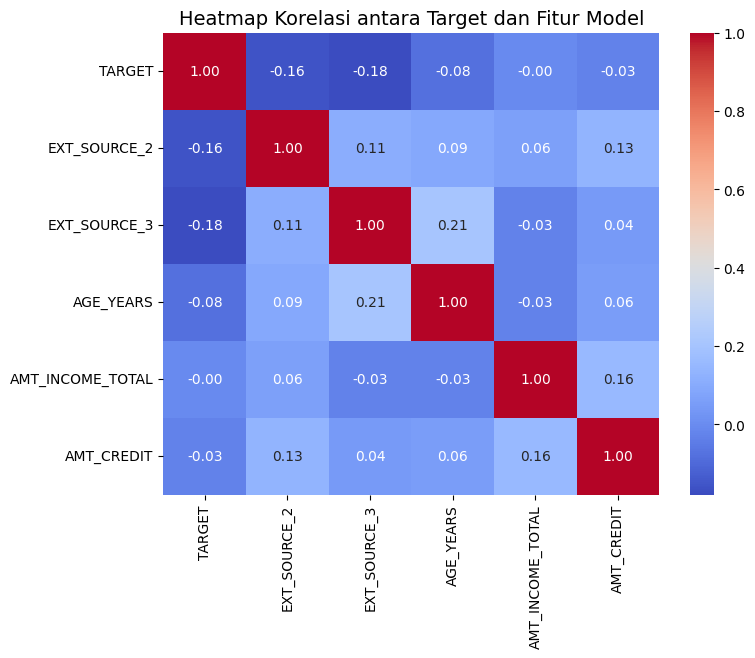

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tambahkan kolom umur dari DAYS_BIRTH
df["AGE_YEARS"] = (-df["DAYS_BIRTH"] / 365).astype(int)

# Pilih fitur + target
features = ["TARGET", "EXT_SOURCE_2", "EXT_SOURCE_3", "AGE_YEARS", "AMT_INCOME_TOTAL", "AMT_CREDIT"]

# Subset data
df_corr = df[features]

# Hitung korelasi
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi antara Target dan Fitur Model", fontsize=14)
plt.show()


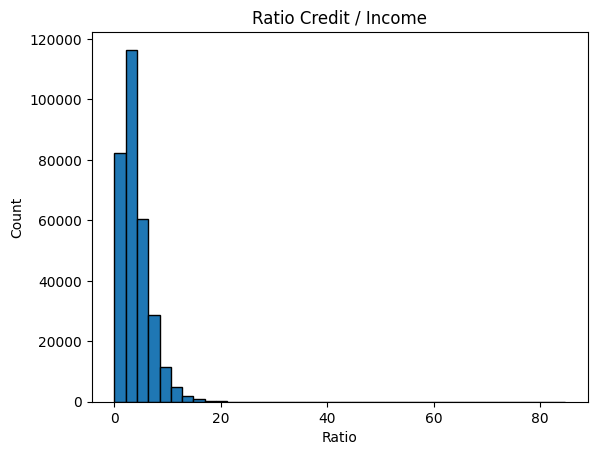

In [10]:
# 3. Rasio Kredit terhadap Pendapatan
df["CREDIT_INCOME_RATIO"] = df["AMT_CREDIT"] / df["AMT_INCOME_TOTAL"]
plt.hist(df["CREDIT_INCOME_RATIO"].dropna(), bins=40, edgecolor="k")
plt.title("Ratio Credit / Income")
plt.xlabel("Ratio")
plt.ylabel("Count")
plt.show()

In [11]:
#  Cek Skewness fitur numerik ====
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
skewness = df[num_cols].skew().sort_values(ascending=False)

print("Top 10 kolom paling skewed (positif):")
print(skewness.head(10))
print("\nTop 10 kolom paling skewed (negatif):")
print(skewness.tail(10))

Top 10 kolom paling skewed (positif):
FLAG_DOCUMENT_12             392.114779
AMT_INCOME_TOTAL             391.559654
FLAG_DOCUMENT_10             209.589054
FLAG_DOCUMENT_2              153.791817
AMT_REQ_CREDIT_BUREAU_QRT    134.365776
FLAG_DOCUMENT_4              110.894364
FLAG_DOCUMENT_7               72.174108
FLAG_DOCUMENT_17              61.214140
FLAG_DOCUMENT_21              54.612939
FLAG_DOCUMENT_20              44.364897
dtype: float64

Top 10 kolom paling skewed (negatif):
FLAG_DOCUMENT_3                  -0.925725
YEARS_BUILD_AVG                  -0.962485
YEARS_BUILD_MEDI                 -0.962784
YEARS_BUILD_MODE                 -1.002305
FLAG_EMP_PHONE                   -1.664886
YEARS_BEGINEXPLUATATION_MODE    -14.755318
YEARS_BEGINEXPLUATATION_AVG     -15.515264
YEARS_BEGINEXPLUATATION_MEDI    -15.573124
FLAG_CONT_MOBILE                -23.081172
FLAG_MOBIL                     -554.536744
dtype: float64


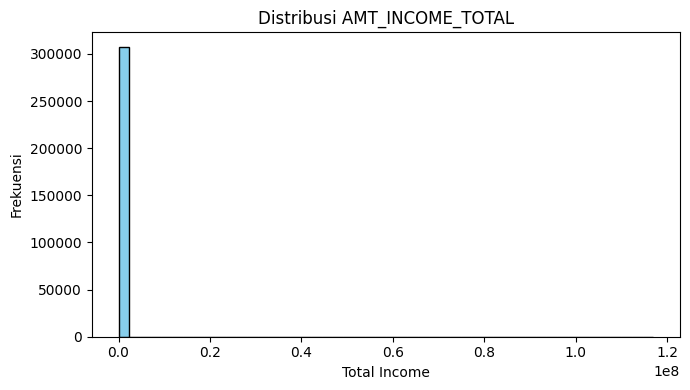

In [12]:
# Pilih kolom
col = "AMT_INCOME_TOTAL"
data = df[col].dropna()

# Histogram
plt.figure(figsize=(7,4))
plt.hist(data, bins=50, edgecolor="k", color="skyblue")
plt.title("Distribusi AMT_INCOME_TOTAL")
plt.xlabel("Total Income")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

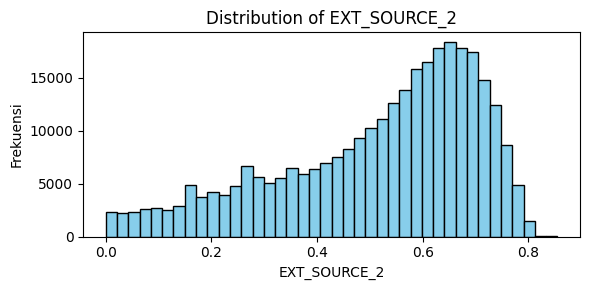

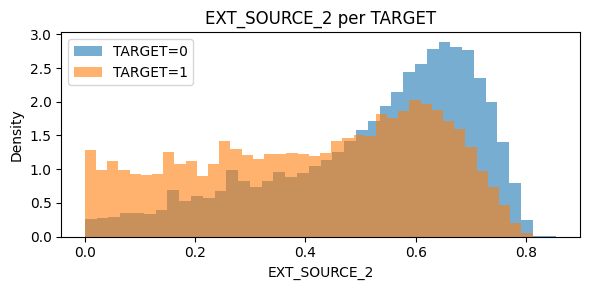

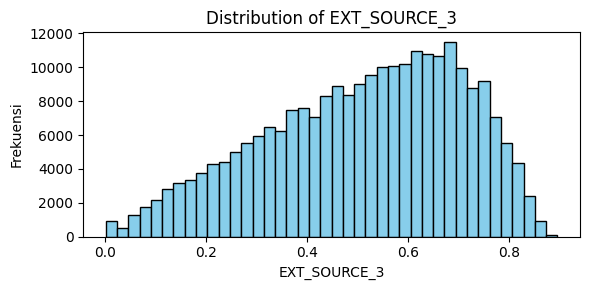

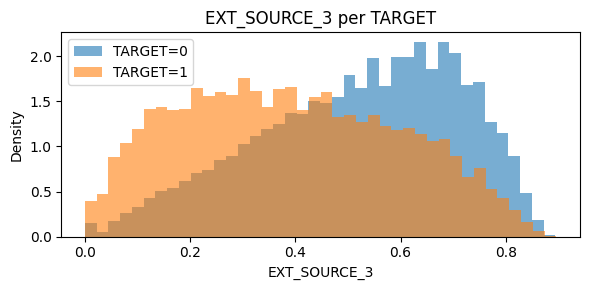

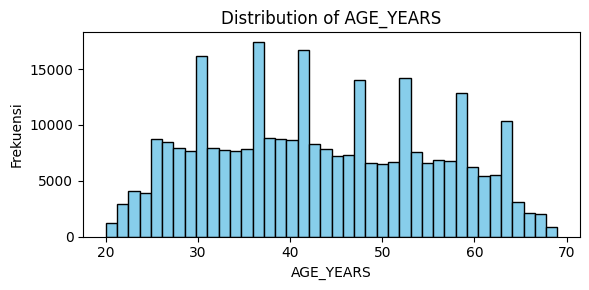

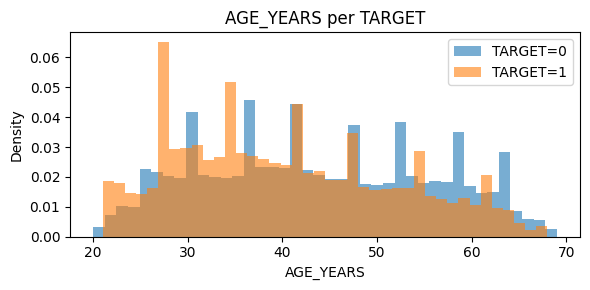

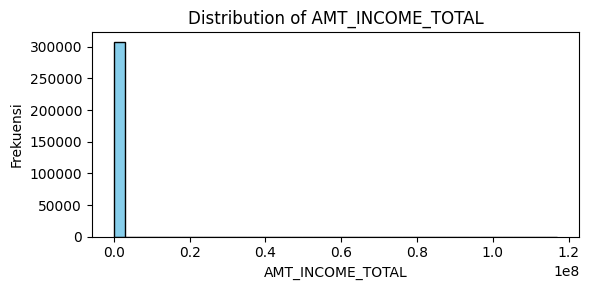

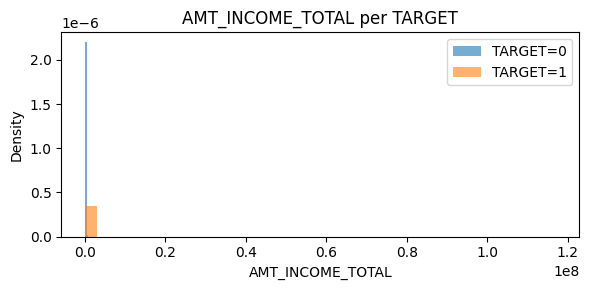

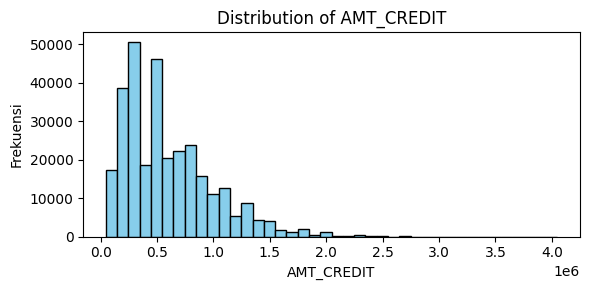

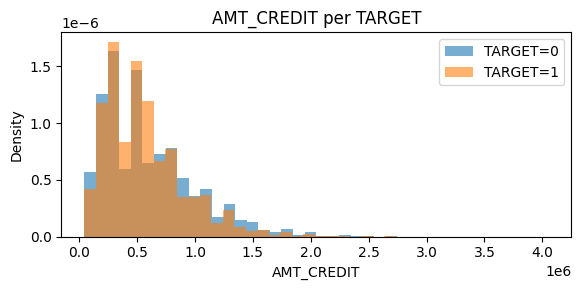

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Konversi DAYS_BIRTH ke umur (tahun)
df["AGE_YEARS"] = (-df["DAYS_BIRTH"] / 365).astype(int)

# Pilih fitur
features = ["EXT_SOURCE_2", "EXT_SOURCE_3", "AGE_YEARS", "AMT_INCOME_TOTAL", "AMT_CREDIT"]

for col in features:
    if col not in df.columns:
        continue
    
    data = df[col].dropna()
    
    # --- Histogram keseluruhan ---
    plt.figure(figsize=(6,3))
    plt.hist(data, bins=40, edgecolor="k", color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col); plt.ylabel("Frekuensi")
    plt.tight_layout()
    plt.show()
    
    # --- Histogram per TARGET ---
    plt.figure(figsize=(6,3))
    d0 = df.loc[df["TARGET"]==0, col].dropna()
    d1 = df.loc[df["TARGET"]==1, col].dropna()
    
    plt.hist(d0, bins=40, alpha=0.6, density=True, label="TARGET=0")
    plt.hist(d1, bins=40, alpha=0.6, density=True, label="TARGET=1")
    plt.title(f"{col} per TARGET")
    plt.xlabel(col); plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [17]:
# Pilih fitur utama
features = ["EXT_SOURCE_2", "EXT_SOURCE_3", "AGE_YEARS", "AMT_INCOME_TOTAL", "AMT_CREDIT"]

X = df[features]
y = df["TARGET"]

# Train-Test Split (80:20, stratify untuk menjaga distribusi target)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("\nDistribusi TARGET di Train:")
print(y_train.value_counts(normalize=True))
print("\nDistribusi TARGET di Test:")
print(y_test.value_counts(normalize=True))

Train shape: (246008, 5)  Test shape: (61503, 5)

Distribusi TARGET di Train:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

Distribusi TARGET di Test:
TARGET
0    0.919272
1    0.080728
Name: proportion, dtype: float64



=== Outlier Report (Training Data) ===
                  Outlier_Count  Outlier_Percent
EXT_SOURCE_2                0.0         0.000000
EXT_SOURCE_3                0.0         0.000000
AGE_YEARS                   0.0         0.000000
AMT_INCOME_TOTAL        11247.0         4.571803
AMT_CREDIT               5260.0         2.138142


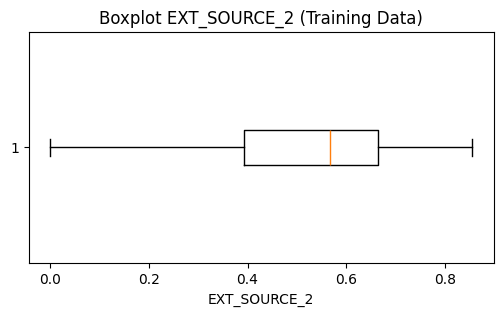

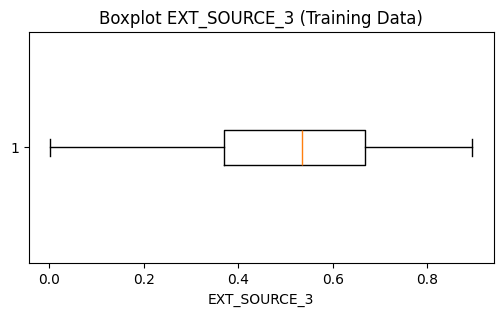

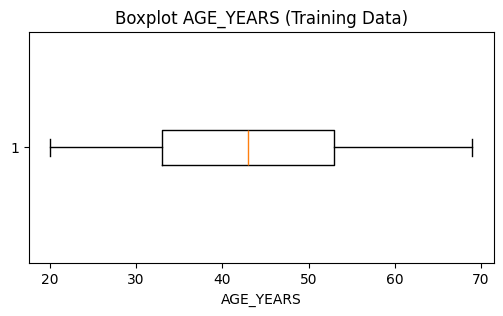

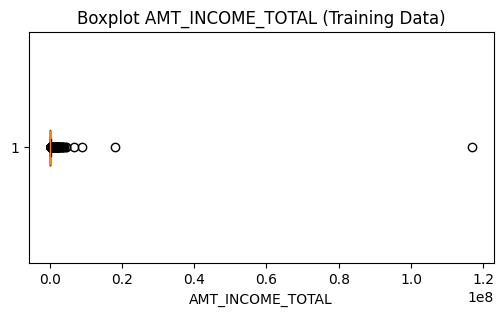

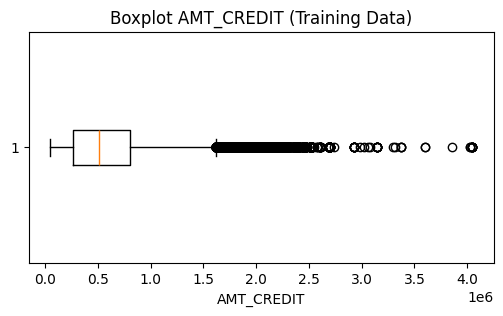

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("application_train.csv")

# Konversi DAYS_BIRTH ke umur
df["AGE_YEARS"] = (-df["DAYS_BIRTH"] / 365).astype(int)

# Pilih fitur utama
features = ["EXT_SOURCE_2", "EXT_SOURCE_3", "AGE_YEARS", "AMT_INCOME_TOTAL", "AMT_CREDIT"]
X = df[features]
y = df["TARGET"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 1. Deteksi outlier pakai IQR ===
outlier_report = {}

for col in features:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = ((X_train[col] < lower_bound) | (X_train[col] > upper_bound)).sum()
    outlier_report[col] = {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Lower_Bound": lower_bound,
        "Upper_Bound": upper_bound,
        "Outlier_Count": outliers,
        "Outlier_Percent": 100 * outliers / len(X_train)
    }

outlier_df = pd.DataFrame(outlier_report).T
print("\n=== Outlier Report (Training Data) ===")
print(outlier_df[["Outlier_Count", "Outlier_Percent"]])

# === 2. Visualisasi Boxplot untuk fitur numerik ===
for col in features:
    plt.figure(figsize=(6,3))
    plt.boxplot(X_train[col].dropna(), vert=False)
    plt.title(f"Boxplot {col} (Training Data)")
    plt.xlabel(col)
    plt.show()


In [19]:
# ===== Log transform di X_train =====
X_train["LOG_AMT_INCOME_TOTAL"] = np.log1p(X_train["AMT_INCOME_TOTAL"])
X_train["LOG_AMT_CREDIT"] = np.log1p(X_train["AMT_CREDIT"])

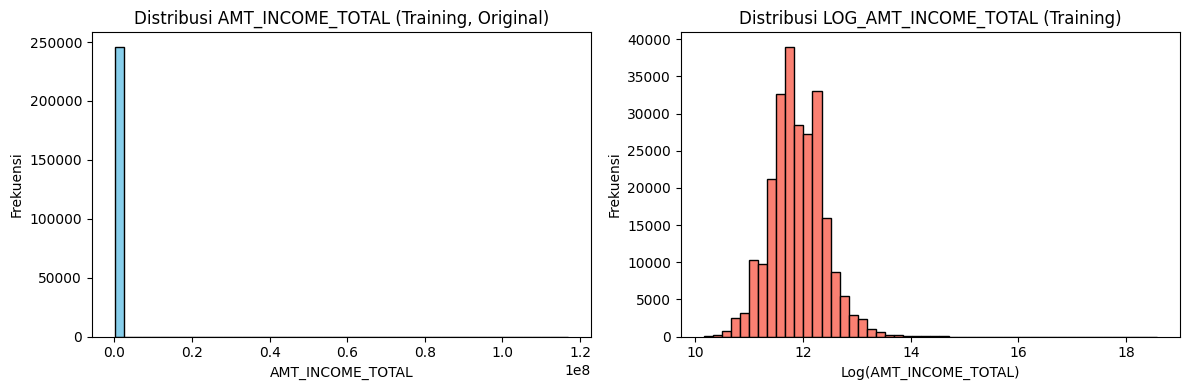

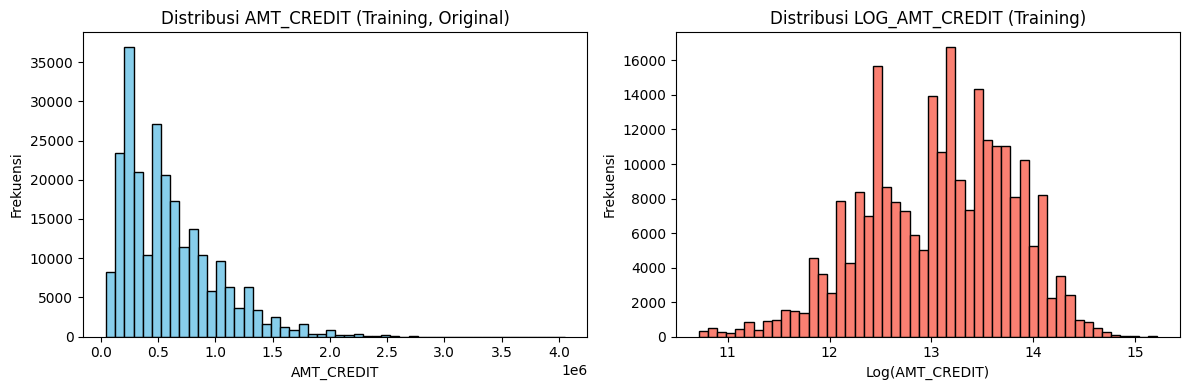

In [20]:
# ===== Histogram sebelum & sesudah log =====
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(X_train["AMT_INCOME_TOTAL"].dropna(), bins=50, color="skyblue", edgecolor="k")
plt.title("Distribusi AMT_INCOME_TOTAL (Training, Original)")
plt.xlabel("AMT_INCOME_TOTAL"); plt.ylabel("Frekuensi")

plt.subplot(1,2,2)
plt.hist(X_train["LOG_AMT_INCOME_TOTAL"].dropna(), bins=50, color="salmon", edgecolor="k")
plt.title("Distribusi LOG_AMT_INCOME_TOTAL (Training)")
plt.xlabel("Log(AMT_INCOME_TOTAL)"); plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(X_train["AMT_CREDIT"].dropna(), bins=50, color="skyblue", edgecolor="k")
plt.title("Distribusi AMT_CREDIT (Training, Original)")
plt.xlabel("AMT_CREDIT"); plt.ylabel("Frekuensi")

plt.subplot(1,2,2)
plt.hist(X_train["LOG_AMT_CREDIT"].dropna(), bins=50, color="salmon", edgecolor="k")
plt.title("Distribusi LOG_AMT_CREDIT (Training)")
plt.xlabel("Log(AMT_CREDIT)"); plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()

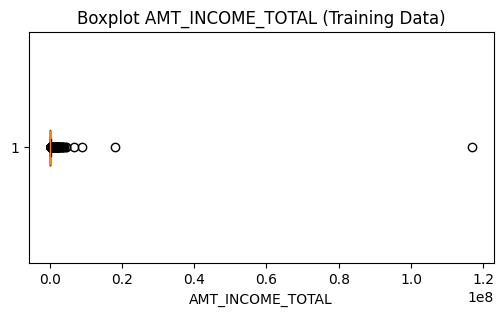

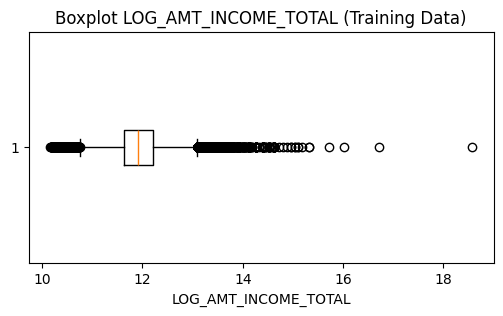

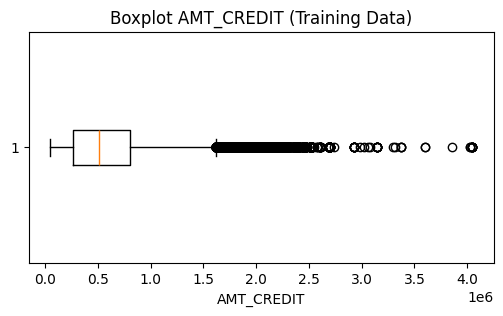

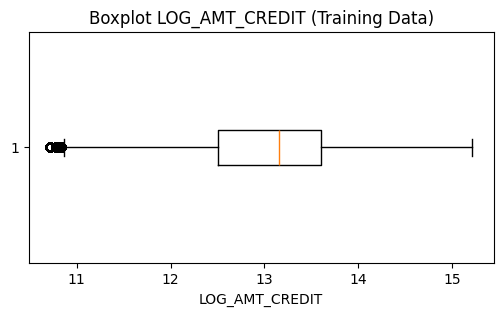

In [18]:
# ===== Boxplot Training =====
for col in ["AMT_INCOME_TOTAL", "LOG_AMT_INCOME_TOTAL",
            "AMT_CREDIT", "LOG_AMT_CREDIT"]:
    plt.figure(figsize=(6,3))
    plt.boxplot(X_train[col].dropna(), vert=False)
    plt.title(f"Boxplot {col} (Training Data)")
    plt.xlabel(col)
    plt.show()

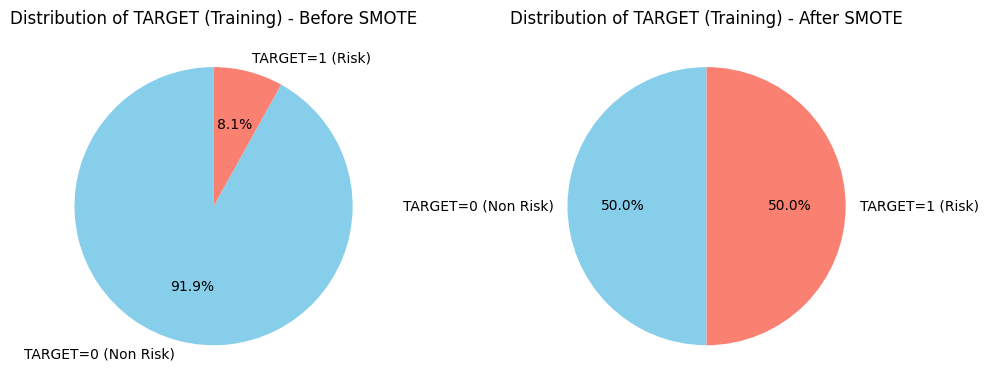

In [21]:
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import pandas as pd

# Imputasi dulu (SMOTE butuh tanpa NaN)
imp = SimpleImputer(strategy="median")
X_train_imp = pd.DataFrame(imp.fit_transform(X_train), columns=X_train.columns)

# SMOTE pada training set
smote = SMOTE(random_state=42, sampling_strategy=1.0)
X_train_sm, y_train_sm = smote.fit_resample(X_train_imp, y_train)

# Hitung distribusi sebelum & sesudah
counts_before = Counter(y_train)
counts_after = Counter(y_train_sm)

# Pie chart sebelum balancing
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.pie(
    [counts_before[0], counts_before[1]],
    labels=["TARGET=0 (Non Risk)", "TARGET=1 (Risk)"],
    autopct='%1.1f%%',
    colors=["skyblue","salmon"],
    startangle=90
)
plt.title("Distribution of TARGET (Training) - Before SMOTE")

# Pie chart sesudah balancing
plt.subplot(1,2,2)
plt.pie(
    [counts_after[0], counts_after[1]],
    labels=["TARGET=0 (Non Risk)", "TARGET=1 (Risk)"],
    autopct='%1.1f%%',
    colors=["skyblue","salmon"],
    startangle=90
)
plt.title("Distribution of TARGET (Training) - After SMOTE")

plt.tight_layout()
plt.show()


In [24]:
# ==== IMPORTS ====
import pandas as pd
from sklearn.impute import SimpleImputer        # <- sebelumnya belum di-import
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

# ==== DEFINISI KOLOM ====
scale_cols = ["AGE_YEARS", "AMT_INCOME_TOTAL", "AMT_CREDIT"]  # skala besar/berbeda
pass_cols  = ["EXT_SOURCE_2", "EXT_SOURCE_3"]                  # sudah 0–1, biarkan

# Pastikan semua kolom ada di X_train/X_test (kalau tidak, ambil irisan yang ada)
available_cols = [c for c in scale_cols + pass_cols if c in X_train.columns]
missing_cols   = set(scale_cols + pass_cols) - set(available_cols)
if missing_cols:
    print("Peringatan: kolom berikut tidak ditemukan dan diabaikan:", missing_cols)

# ==== 1) IMPUTASI (TRAIN & TEST) ====
imp = SimpleImputer(strategy="median")
X_train_imp = pd.DataFrame(imp.fit_transform(X_train[available_cols]), columns=available_cols)
X_test_imp  = pd.DataFrame(imp.transform(X_test[available_cols]),  columns=available_cols)

# ==== 2) SMOTE (HANYA TRAIN) ====
smote = SMOTE(random_state=42, sampling_strategy=1.0)
X_train_sm, y_train_sm = smote.fit_resample(X_train_imp, y_train)

# ==== 3) COLUMNTRANSFORMER (SCALE sebagian kolom, sisanya passthrough) ====
# Gunakan hanya kolom yang tersedia
scale_cols_in = [c for c in scale_cols if c in available_cols]
pass_cols_in  = [c for c in pass_cols  if c in available_cols]
cols_order    = scale_cols_in + pass_cols_in  # urutan output yang diharapkan

ct = ColumnTransformer(
    transformers=[
        ("std", StandardScaler(), scale_cols_in),
        ("keep", "passthrough", pass_cols_in),
    ],
    remainder="drop"
)

# ==== 4) FIT SCALER DI TRAIN (SMOTE), TRANSFORM TRAIN & TEST ====
X_train_scaled_arr = ct.fit_transform(pd.DataFrame(X_train_sm, columns=available_cols))
X_test_scaled_arr  = ct.transform(X_test_imp)

# ColumnTransformer menjaga urutan: [scaled(scale_cols_in) + passthrough(pass_cols_in)]
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=cols_order)
X_test_scaled  = pd.DataFrame(X_test_scaled_arr,  columns=cols_order)

# ==== 5) CEK RINGKAS ====
print(X_train_scaled.describe().T[["mean","std"]].round(2))


                  mean   std
AGE_YEARS        -0.00  1.00
AMT_INCOME_TOTAL  0.00  1.00
AMT_CREDIT       -0.00  1.00
EXT_SOURCE_2      0.47  0.19
EXT_SOURCE_3      0.47  0.17


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, recall_score

# === 1. Train Logistic Regression (default) ===
logit = LogisticRegression(random_state=42)   # semua parameter default
logit.fit(X_train_scaled, y_train_sm)

# === 2. Prediksi probabilitas & label di test set ===
y_pred_proba = logit.predict_proba(X_test_scaled)[:, 1]
y_pred_label = (y_pred_proba >= 0.5).astype(int)   # default threshold = 0.5

# === 3. Hitung metrik ===
roc_auc = roc_auc_score(y_test, y_pred_proba)
recall  = recall_score(y_test, y_pred_label)

print("Logistic Regression (default)")
print("ROC-AUC (Test) :", round(roc_auc, 4))
print("Recall  (Test) :", round(recall, 4))


Logistic Regression (default)
ROC-AUC (Test) : 0.7117
Recall  (Test) : 0.6296


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, recall_score

# === 1. Train Logistic Regression (default) ===
logit = LogisticRegression(random_state=42)   # semua parameter default
logit.fit(X_train_scaled, y_train_sm)

# === 2a. Evaluasi di TRAINING set ===
y_train_proba = logit.predict_proba(X_train_scaled)[:, 1]
y_train_label = (y_train_proba >= 0.4).astype(int)   # threshold = 0.4

roc_auc_train = roc_auc_score(y_train_sm, y_train_proba)
recall_train  = recall_score(y_train_sm, y_train_label)

print("=== Logistic Regression (Training) ===")
print("ROC-AUC :", round(roc_auc_train, 4))
print("Recall  :", round(recall_train, 4))

# === 2b. Evaluasi di TESTING set ===
y_test_proba = logit.predict_proba(X_test_scaled)[:, 1]
y_test_label = (y_test_proba >= 0.4).astype(int)     # threshold = 0.4

roc_auc_test = roc_auc_score(y_test, y_test_proba)
recall_test  = recall_score(y_test, y_test_label)

print("\n=== Logistic Regression (Testing) ===")
print("ROC-AUC :", round(roc_auc_test, 4))
print("Recall  :", round(recall_test, 4))


=== Logistic Regression (Training) ===
ROC-AUC : 0.7309
Recall  : 0.8217

=== Logistic Regression (Testing) ===
ROC-AUC : 0.7117
Recall  : 0.7722


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, recall_score

# === 1. Train Random Forest (default) ===
rf = RandomForestClassifier(random_state=42)  
rf.fit(X_train_scaled, y_train_sm)

# === 2. Prediksi probabilitas & label di test set ===
y_pred_proba = rf.predict_proba(X_test_scaled)[:,1]
y_pred_label = (y_pred_proba >= 0.5).astype(int)

# === 3. Hitung metrik ===
roc_auc = roc_auc_score(y_test, y_pred_proba)
recall  = recall_score(y_test, y_pred_label)

print("Random Forest (default) - ROC-AUC:", round(roc_auc, 4))
print("Random Forest (default) - Recall :", round(recall, 4))


Random Forest (default) - ROC-AUC: 0.6418
Random Forest (default) - Recall : 0.287


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, recall_score

# === 1. Train Random Forest (default) ===
rf = RandomForestClassifier(random_state=42) 
rf.fit(X_train_scaled, y_train_sm)

# === 2. Prediksi probabilitas & label di test set ===
y_pred_proba = rf.predict_proba(X_test_scaled)[:,1]
y_pred_label = (y_pred_proba >= 0.4).astype(int)

# === 3. Hitung metrik ===
roc_auc = roc_auc_score(y_test, y_pred_proba)
recall  = recall_score(y_test, y_pred_label)

print("Random Forest (default) - ROC-AUC:", round(roc_auc, 4))
print("Random Forest (default) - Recall :", round(recall, 4))


Random Forest (default) - ROC-AUC: 0.6418
Random Forest (default) - Recall : 0.4145


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, recall_score

# === 1. Train Random Forest (default) ===
rf = RandomForestClassifier(random_state=42)   # parameter default
rf.fit(X_train_scaled, y_train_sm)

# === 2a. Evaluasi di TRAINING set ===
y_train_proba = rf.predict_proba(X_train_scaled)[:, 1]
y_train_label = (y_train_proba >= 0.4).astype(int)   # threshold = 0.4

roc_auc_train = roc_auc_score(y_train_sm, y_train_proba)
recall_train  = recall_score(y_train_sm, y_train_label)

print("=== Random Forest (Training) ===")
print("ROC-AUC :", round(roc_auc_train, 4))
print("Recall  :", round(recall_train, 4))

# === 2b. Evaluasi di TESTING set ===
y_test_proba = rf.predict_proba(X_test_scaled)[:, 1]
y_test_label = (y_test_proba >= 0.4).astype(int)     # threshold = 0.4

roc_auc_test = roc_auc_score(y_test, y_test_proba)
recall_test  = recall_score(y_test, y_test_label)

print("\n=== Random Forest (Testing) ===")
print("ROC-AUC :", round(roc_auc_test, 4))
print("Recall  :", round(recall_test, 4))


=== Random Forest (Training) ===
ROC-AUC : 1.0
Recall  : 1.0

=== Random Forest (Testing) ===
ROC-AUC : 0.6418
Recall  : 0.4145


In [25]:
from xgboost import XGBClassifier

# === 1. Train XGBoost (default) ===
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train_scaled, y_train_sm)

# === 2. Prediksi ===
y_pred_proba = xgb.predict_proba(X_test_scaled)[:,1]
y_pred_label = (y_pred_proba >= 0.5).astype(int)

# === 3. Metrik ===
roc_auc = roc_auc_score(y_test, y_pred_proba)
recall  = recall_score(y_test, y_pred_label)

print("XGBoost - ROC-AUC:", round(roc_auc, 4))
print("XGBoost - Recall :", round(recall, 4))


D:\DataScience\InstalasiAnaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:46:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - ROC-AUC: 0.6726
XGBoost - Recall : 0.2365


In [26]:
from xgboost import XGBClassifier

# === 1. Train XGBoost (default) ===
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train_scaled, y_train_sm)

# === 2. Prediksi ===
y_pred_proba = xgb.predict_proba(X_test_scaled)[:,1]
y_pred_label = (y_pred_proba >= 0.4).astype(int)

# === 3. Metrik ===
roc_auc = roc_auc_score(y_test, y_pred_proba)
recall  = recall_score(y_test, y_pred_label)

print("XGBoost - ROC-AUC:", round(roc_auc, 4))
print("XGBoost - Recall :", round(recall, 4))


D:\DataScience\InstalasiAnaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:46:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - ROC-AUC: 0.6726
XGBoost - Recall : 0.3823


In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, recall_score

# === 1. Train XGBoost (default) ===
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train_scaled, y_train_sm)

# === 2a. Evaluasi di TRAINING set ===
y_train_proba = xgb.predict_proba(X_train_scaled)[:, 1]
y_train_label = (y_train_proba >= 0.4).astype(int)   # threshold = 0.4

roc_auc_train = roc_auc_score(y_train_sm, y_train_proba)
recall_train  = recall_score(y_train_sm, y_train_label)

print("=== XGBoost (Training) ===")
print("ROC-AUC :", round(roc_auc_train, 4))
print("Recall  :", round(recall_train, 4))

# === 2b. Evaluasi di TESTING set ===
y_test_proba = xgb.predict_proba(X_test_scaled)[:, 1]
y_test_label = (y_test_proba >= 0.4).astype(int)     # threshold = 0.4

roc_auc_test = roc_auc_score(y_test, y_test_proba)
recall_test  = recall_score(y_test, y_test_label)

print("\n=== XGBoost (Testing) ===")
print("ROC-AUC :", round(roc_auc_test, 4))
print("Recall  :", round(recall_test, 4))


D:\DataScience\InstalasiAnaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:20:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost (Training) ===
ROC-AUC : 0.9271
Recall  : 0.8544

=== XGBoost (Testing) ===
ROC-AUC : 0.6726
Recall  : 0.3823


In [27]:
from sklearn.neighbors import KNeighborsClassifier

# === 1. Train KNN (default) ===
knn = KNeighborsClassifier()   # default n_neighbors=5
knn.fit(X_train_scaled, y_train_sm)

# === 2. Prediksi ===
y_pred_proba = knn.predict_proba(X_test_scaled)[:,1]
y_pred_label = (y_pred_proba >= 0.5).astype(int)

# === 3. Metrik ===
roc_auc = roc_auc_score(y_test, y_pred_proba)
recall  = recall_score(y_test, y_pred_label)

print("KNN - ROC-AUC:", round(roc_auc, 4))
print("KNN - Recall :", round(recall, 4))


KNN - ROC-AUC: 0.6225
KNN - Recall : 0.5049


In [28]:
from sklearn.neighbors import KNeighborsClassifier

# === 1. Train KNN (default) ===
knn = KNeighborsClassifier()   # default n_neighbors=5
knn.fit(X_train_scaled, y_train_sm)

# === 2. Prediksi ===
y_pred_proba = knn.predict_proba(X_test_scaled)[:,1]
y_pred_label = (y_pred_proba >= 0.4).astype(int)

# === 3. Metrik ===
roc_auc = roc_auc_score(y_test, y_pred_proba)
recall  = recall_score(y_test, y_pred_label)

print("KNN - ROC-AUC:", round(roc_auc, 4))
print("KNN - Recall :", round(recall, 4))


KNN - ROC-AUC: 0.6225
KNN - Recall : 0.6868


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, recall_score

# === 1. Train KNN (default) ===
knn = KNeighborsClassifier()   # default n_neighbors=5
knn.fit(X_train_scaled, y_train_sm)

# === 2a. Evaluasi di TRAINING set ===
y_train_proba = knn.predict_proba(X_train_scaled)[:, 1]
y_train_label = (y_train_proba >= 0.4).astype(int)   # threshold = 0.4

roc_auc_train = roc_auc_score(y_train_sm, y_train_proba)
recall_train  = recall_score(y_train_sm, y_train_label)

print("=== KNN (Training) ===")
print("ROC-AUC :", round(roc_auc_train, 4))
print("Recall  :", round(recall_train, 4))

# === 2b. Evaluasi di TESTING set ===
y_test_proba = knn.predict_proba(X_test_scaled)[:, 1]
y_test_label = (y_test_proba >= 0.4).astype(int)     # threshold = 0.4

roc_auc_test = roc_auc_score(y_test, y_test_proba)
recall_test  = recall_score(y_test, y_test_label)

print("\n=== KNN (Testing) ===")
print("ROC-AUC :", round(roc_auc_test, 4))
print("Recall  :", round(recall_test, 4))


=== KNN (Training) ===
ROC-AUC : 0.926
Recall  : 0.977

=== KNN (Testing) ===
ROC-AUC : 0.6225
Recall  : 0.6868


In [29]:
from sklearn.ensemble import AdaBoostClassifier

# === 1. Train AdaBoost (default) ===
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train_scaled, y_train_sm)

# === 2. Prediksi ===
y_pred_proba = ada.predict_proba(X_test_scaled)[:,1]
y_pred_label = (y_pred_proba >= 0.5).astype(int)

# === 3. Metrik ===
roc_auc = roc_auc_score(y_test, y_pred_proba)
recall  = recall_score(y_test, y_pred_label)

print("AdaBoost - ROC-AUC:", round(roc_auc, 4))
print("AdaBoost - Recall :", round(recall, 4))


AdaBoost - ROC-AUC: 0.6666
AdaBoost - Recall : 0.5712


In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score, recall_score

# === 1. Train AdaBoost (default) ===
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train_scaled, y_train_sm)

# === 2a. Evaluasi di TRAINING set ===
y_train_proba = ada.predict_proba(X_train_scaled)[:, 1]
y_train_label = (y_train_proba >= 0.4).astype(int)   # threshold = 0.4

roc_auc_train = roc_auc_score(y_train_sm, y_train_proba)
recall_train  = recall_score(y_train_sm, y_train_label)

print("=== AdaBoost (Training) ===")
print("ROC-AUC :", round(roc_auc_train, 4))
print("Recall  :", round(recall_train, 4))

# === 2b. Evaluasi di TESTING set ===
y_test_proba = ada.predict_proba(X_test_scaled)[:, 1]
y_test_label = (y_test_proba >= 0.4).astype(int)     # threshold = 0.4

roc_auc_test = roc_auc_score(y_test, y_test_proba)
recall_test  = recall_score(y_test, y_test_label)

print("\n=== AdaBoost (Testing) ===")
print("ROC-AUC :", round(roc_auc_test, 4))
print("Recall  :", round(recall_test, 4))


=== AdaBoost (Training) ===
ROC-AUC : 0.7902
Recall  : 1.0

=== AdaBoost (Testing) ===
ROC-AUC : 0.6666
Recall  : 1.0


ROC-AUC (Test) : 0.7117
Recall  (Test) : 0.7722


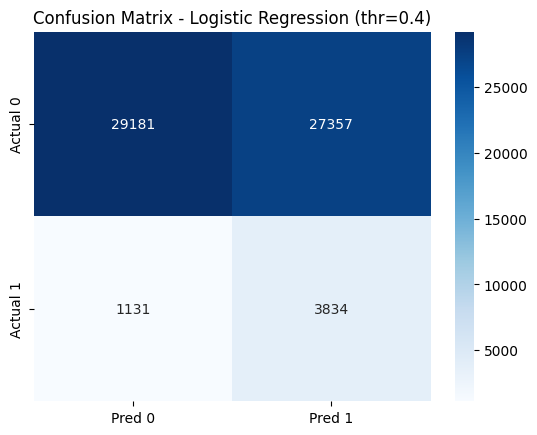


Classification Report (thr=0.4):
              precision    recall  f1-score   support

           0     0.9627    0.5161    0.6720     56538
           1     0.1229    0.7722    0.2121      4965

    accuracy                         0.5368     61503
   macro avg     0.5428    0.6442    0.4420     61503
weighted avg     0.8949    0.5368    0.6349     61503



In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Train Logistic Regression (default params) ===
logit = LogisticRegression(max_iter=1000, solver="lbfgs", random_state=42)
logit.fit(X_train_scaled, y_train_sm)

# === 2. Prediksi probabilitas & label dengan threshold 0.4 ===
y_pred_proba = logit.predict_proba(X_test_scaled)[:,1]
y_pred_label = (y_pred_proba >= 0.4).astype(int)   # threshold 0.4

# === 3. Hitung metrik ===
roc_auc = roc_auc_score(y_test, y_pred_proba)  # AUC tetap sama (tidak tergantung threshold)
recall  = recall_score(y_test, y_pred_label)

print("ROC-AUC (Test) :", round(roc_auc, 4))
print("Recall  (Test) :", round(recall, 4))

# === 4. Confusion Matrix untuk lihat trade-off ===
cm = confusion_matrix(y_test, y_pred_label)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred 0","Pred 1"],
            yticklabels=["Actual 0","Actual 1"])
plt.title("Confusion Matrix - Logistic Regression (thr=0.4)")
plt.show()

# === 5. Tambahan laporan klasifikasi ===
print("\nClassification Report (thr=0.4):")
print(classification_report(y_test, y_pred_label, digits=4))


In [28]:
#skor prediction
# Ambil SK_ID_CURR dari data test
id_test = df.loc[X_test.index, "SK_ID_CURR"]

# Probabilitas default dari model
y_test_proba = logit.predict_proba(X_test_scaled)[:, 1]

# Gabungkan ke DataFrame
pred_df = pd.DataFrame({
    "SK_ID_CURR": id_test.values,
    "TARGET_true": y_test.values,
    "Predicted_proba": y_test_proba,
    "Predicted_label": (y_test_proba >= 0.4).astype(int)
})

display(pred_df.sample(20))


,SK_ID_CURR,TARGET_true,Predicted_proba,Predicted_label
20860,337164,0,0.495205,1
49284,246063,0,0.519991,1
28093,424678,0,0.461961,1
15730,371728,0,0.634891,1
47129,172893,0,0.274794,0
2189,160127,0,0.350847,0
10100,235017,0,0.807345,1
16363,370189,0,0.474254,1
13941,190488,0,0.299670,0
33289,151703,0,0.328429,0
